In [2]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



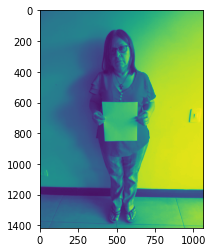

In [3]:
image = cv2.imread('media/photos/estatura.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imgplot = plt.imshow(gray)


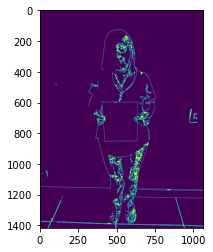

In [4]:
canny = cv2.Canny(gray, 10, 150)
canny = cv2.dilate(canny, None, iterations=1)
canny = cv2.erode(canny, None, iterations=1)
#_, th = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
imgplot = plt.imshow(canny)

In [ ]:
#_,cnts,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)# OpenCV 3
cnts,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)# OpenCV 4

In [ ]:
for c in cnts:
    epsilon = 0.01*cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,epsilon,True)
    #print(len(approx))
    x,y,w,h = cv2.boundingRect(approx)
    
    if len(approx)==4:
        aspect_ratio = float(w)/h
        print('aspect_ratio= ', aspect_ratio)
        if aspect_ratio == 1:
            cv2.putText(image,'Cuadrado', (x,y-5),1,1.5,(0,255,0),2)
        else:
            cv2.putText(image,'Rectangulo', (x,y-5),1,1.5,(0,255,0),2)
    
imgplot = plt.imshow(image)
cv2.drawContours(image, [approx], 0, (0,255,0),2)
cv2.imshow('image',image)
cv2.waitKey(0)

In [ ]:
for c in cnts:
    cv2.drawContours(image, [c], 0, (0,255,0),2)
    cv2.imshow('image',image)
    cv2.waitKey(0)

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

from tensorflow.python.client import device_lib

device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6758256497150154982,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3057333044
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10334966022292304999
 physical_device_desc: "device: 0, name: GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"]